In [40]:
import numpy as np
import pandas as pd

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
%matplotlib inline

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
cancer = load_breast_cancer()

In [45]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
df_feat = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [47]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [48]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

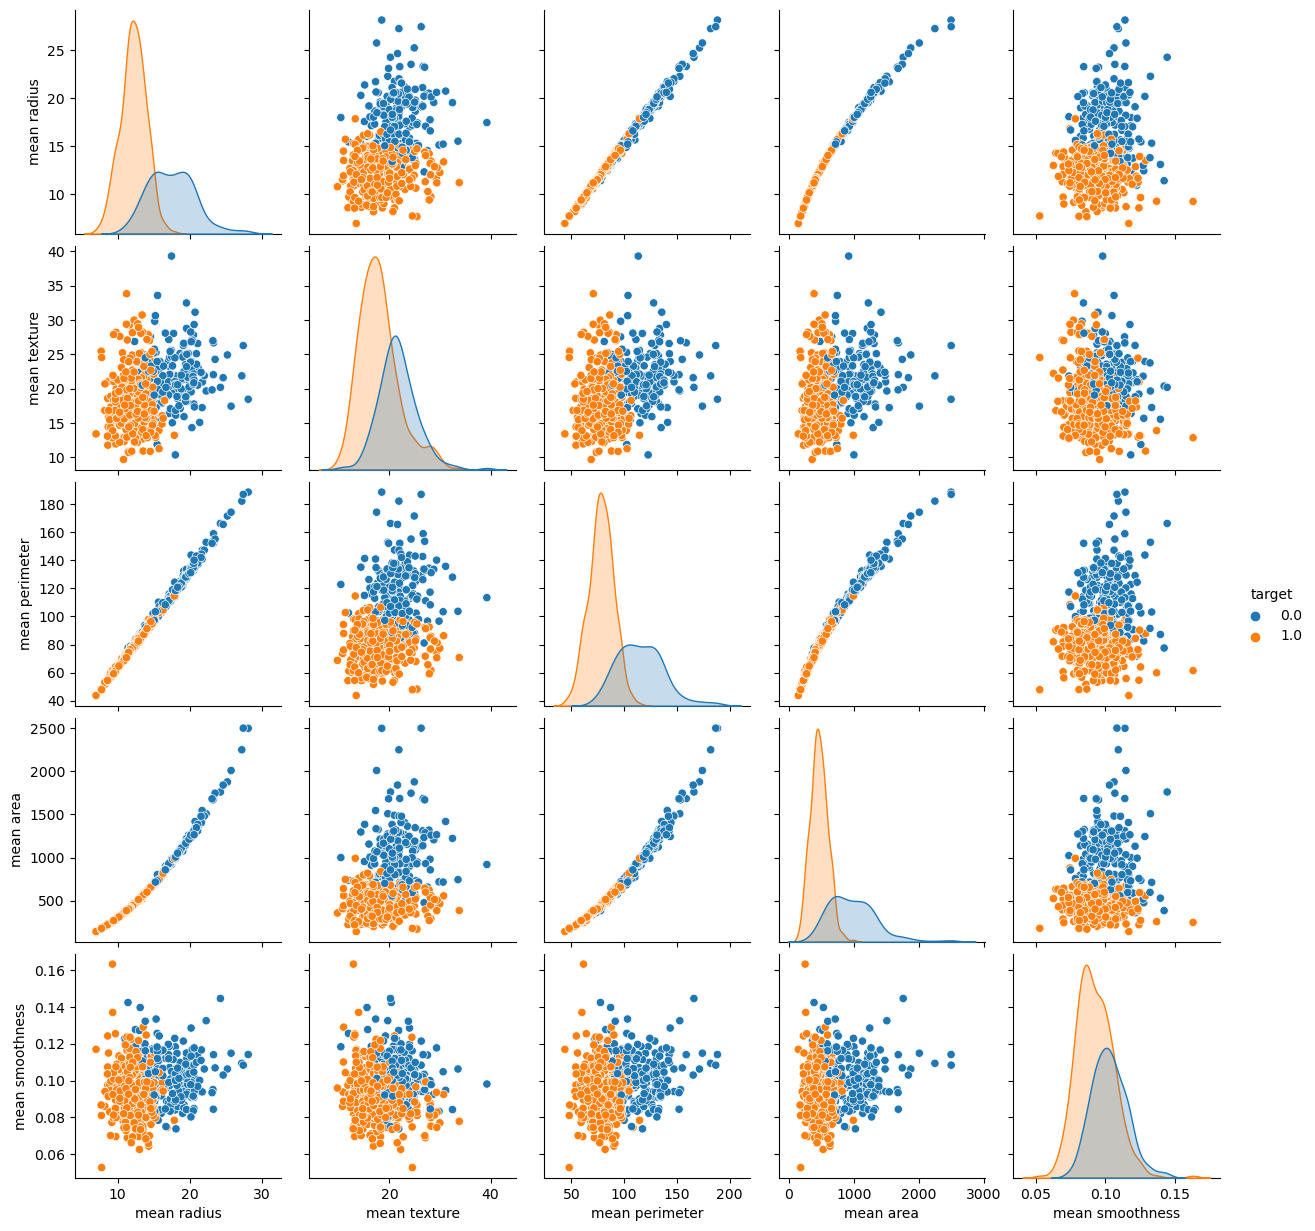

In [49]:
sns.pairplot(df_feat, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.svm import SVC

In [53]:
model = SVC()

In [54]:
model.fit(X_train, y_train)

SVC()

In [55]:
predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [59]:
cm = np.array(confusion_matrix(y_test, predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,102,3
is_healthy,10,56


<AxesSubplot:>

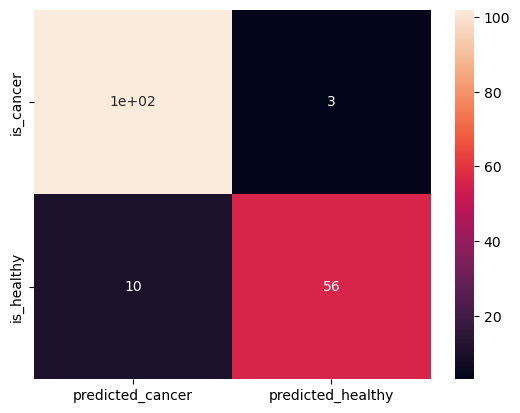

In [60]:
sns.heatmap(confusion, annot=True)

In [61]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.362800
perimeter error              0.771400
area error                   7.228000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.009539
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [62]:
X_train_max = X_train.max()
X_train_max

mean radius                  27.42000
mean texture                 39.28000
mean perimeter              186.90000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.54700
texture error                 4.88500
perimeter error              18.65000
area error                  542.20000
smoothness error              0.02333
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [63]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  20.439000
mean texture                 29.570000
mean perimeter              143.110000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.047480
radius error                  2.435500
texture error                 4.522200
perimeter error              17.878600
area error                  534.972000
smoothness error              0.021617
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.069411
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.520000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [64]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
178,0.294975,0.423064,0.267067,0.162418,0.107310,0.000000,0.003737,0.009205,0.169192,0.050126,...,0.453092,0.188107,0.104109,0.066565,0.006821,0.006371,0.031818,0.143730,0.021144,1.0
421,0.377171,0.144403,0.380337,0.217434,0.548170,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248620,0.242104,1.0
57,0.378150,0.401759,0.361680,0.217773,0.663300,0.359242,0.302952,0.403728,0.488384,0.371104,...,0.497868,0.325166,0.196692,0.433402,0.389741,0.286502,0.630241,0.420347,0.355834,0.0
514,0.394784,0.316537,0.373629,0.236861,0.429239,0.204251,0.175398,0.215457,0.253030,0.193555,...,0.427505,0.315703,0.192145,0.352836,0.177363,0.228914,0.384880,0.141167,0.094097,0.0
548,0.132198,0.325668,0.120607,0.060318,0.350603,0.094841,0.054756,0.047788,0.262626,0.260952,...,0.361674,0.093082,0.043993,0.321799,0.066139,0.074681,0.132165,0.194401,0.157528,1.0


In [65]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [66]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [67]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [68]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,105,0
is_healthy,0,66


In [69]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       105

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

